In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

In [12]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# (Show the shape and column names as well.)
# (Include your Python code and output in the code box below.

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

print("First 10 rows of the dataset:")
display(df.head(10))

print("\nShape of the dataset (rows, columns):", df.shape)

print("\nColumn names in the dataset:", list(df.columns))


First 10 rows of the dataset:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the dataset (rows, columns): (1061, 7)

Column names in the dataset: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


In [13]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
# (Include your Python code and output in the code box below.)

print("Missing values in each column:")
print(df.isna().sum())

df_filled = df.copy()
for c in df_filled:
    if df_filled[c].dtype == "object":
        df_filled[c] = df_filled[c].fillna(df_filled[c].mode()[0])
    else:
        df_filled[c] = df_filled[c].fillna(df_filled[c].median())

print("\nMissing values after handling:")
print(df_filled.isna().sum())



Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


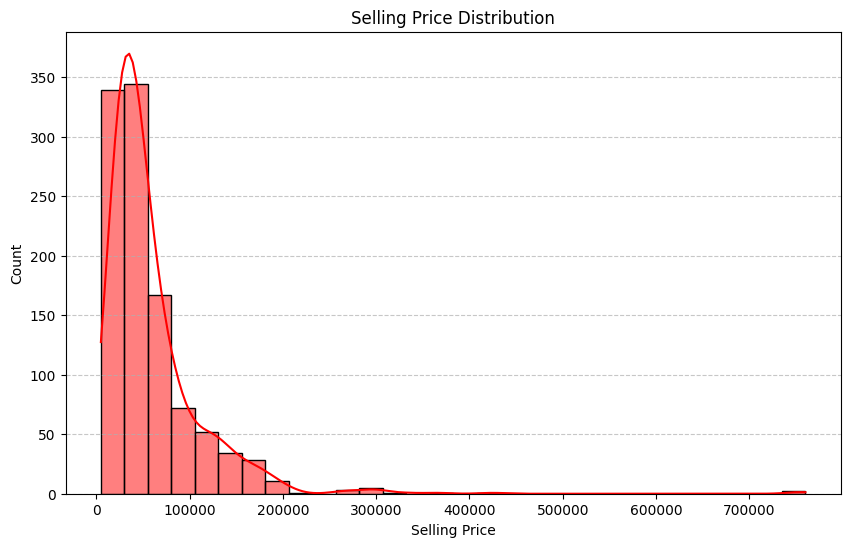


Summary of selling_price:
count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [10]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="selling_price", bins=30, kde=True, color="red")
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print("\nSummary of selling_price:")
print(df["selling_price"].describe())


Average Selling Price by Seller Type:
   seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


/tmp/ipython-input-3780760476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_seller, x="seller_type", y="selling_price", palette="viridis")


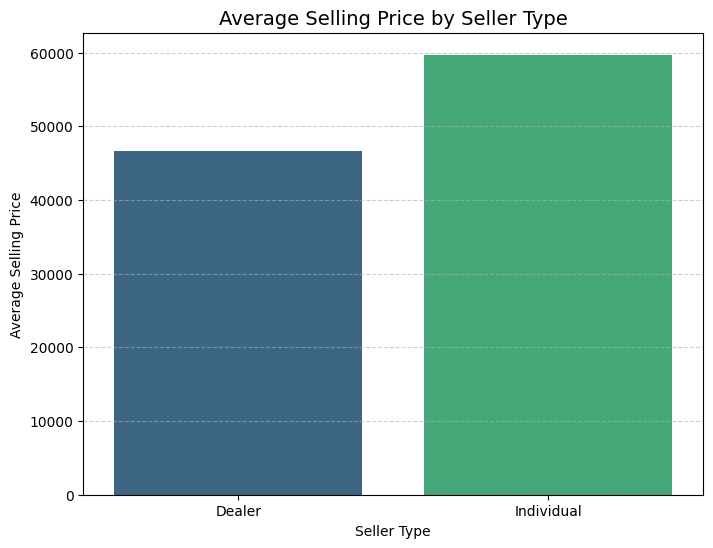

In [14]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
# (Include your Python code and output in the code box below).

avg_price_by_seller = df.groupby("seller_type")["selling_price"].mean().reset_index()

print("Average Selling Price by Seller Type:\n", avg_price_by_seller)

plt.figure(figsize=(8,6))
sns.barplot(data=avg_price_by_seller, x="seller_type", y="selling_price", palette="viridis")
plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Average km_driven by Ownership Type:
        owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


/tmp/ipython-input-3102547949.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_km_by_owner, x="owner", y="km_driven", palette="coolwarm")


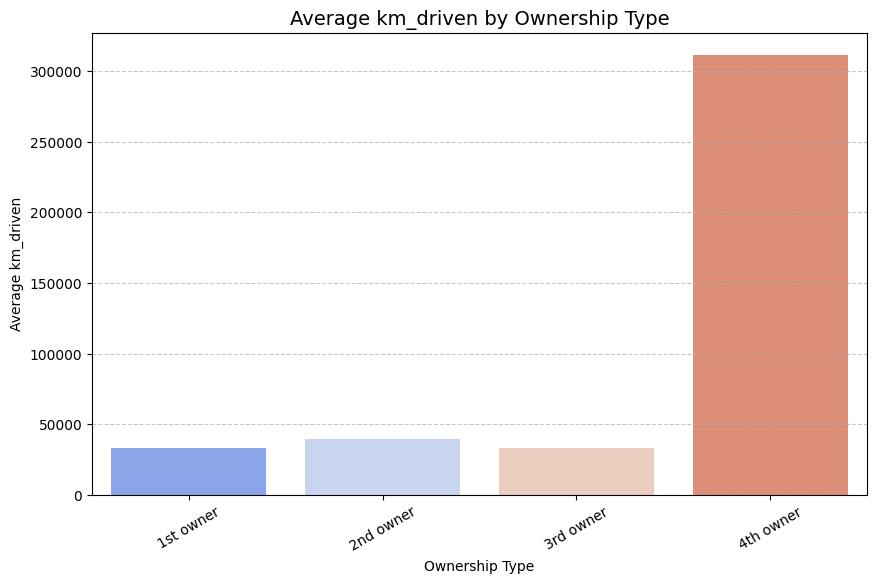

In [18]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.
# (Include your Python code and output in the code box below.)

avg_km_by_owner = df.groupby("owner")["km_driven"].mean().reset_index()

print("Average km_driven by Ownership Type:\n", avg_km_by_owner)

plt.figure(figsize=(10,6))
sns.barplot(data=avg_km_by_owner, x="owner", y="km_driven", palette="coolwarm")
plt.title("Average km_driven by Ownership Type", fontsize=14)
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.
# (Include your Python code and output in the code box below.)

print("Before removing outliers (km_driven stats):")
print(df["km_driven"].describe())

Q1, Q3 = df["km_driven"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df.query(" @lower_bound <= km_driven <= @upper_bound ")

print("\nAfter removing outliers (km_driven stats):")
print(df_no_outliers["km_driven"].describe())

print(f"\nRows before: {df.shape[0]}, Rows after: {df_no_outliers.shape[0]}")

Before removing outliers (km_driven stats):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers (km_driven stats):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061, Rows after: 1022


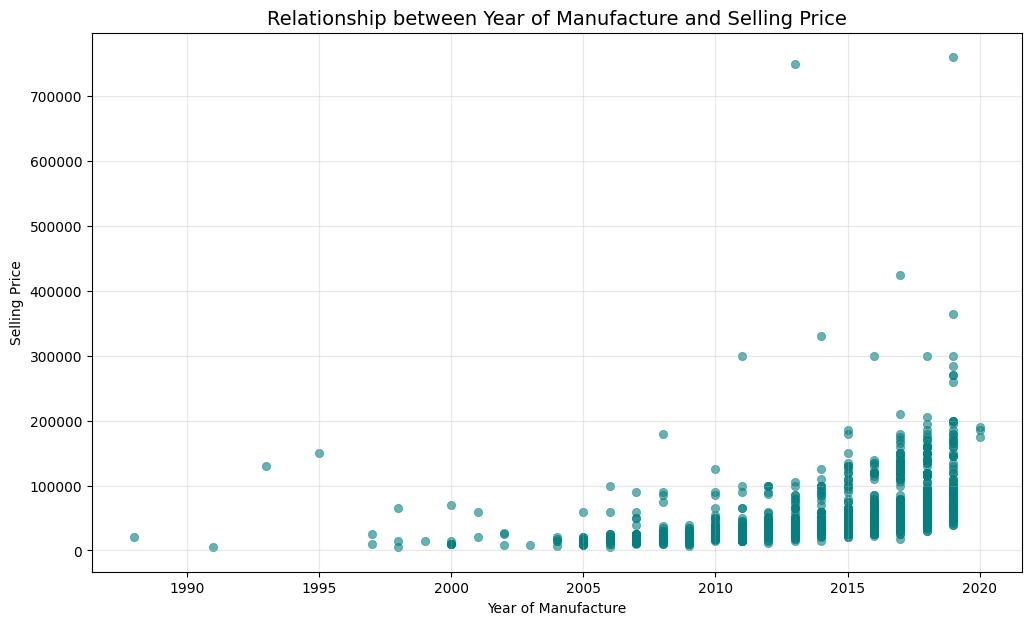

Correlation between Year and Selling Price:
                   year  selling_price
year           1.000000       0.402188
selling_price  0.402188       1.000000


In [20]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.
# (Include your Python code and output in the code box below.)

plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.6, color="teal", edgecolor=None)
plt.title("Relationship between Year of Manufacture and Selling Price", fontsize=14)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(alpha=0.3)
plt.show()

print("Correlation between Year and Selling Price:")
print(df[["year", "selling_price"]].corr())

In [21]:
# Question 8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.
# (Include your Python code and output in the code box below.)

df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=True)
print("First 5 rows after one-hot encoding seller_type:")
display(df_encoded.head(5))

First 5 rows after one-hot encoding seller_type:


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


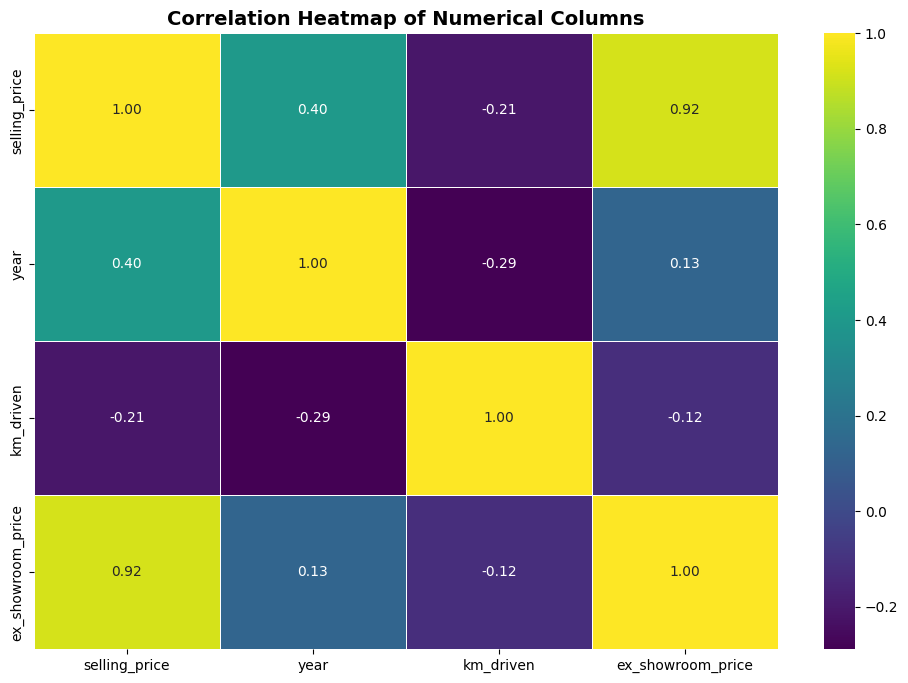

In [23]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?
# (Include your Python code and output in the code box below.)

num_cols = df.select_dtypes(include=['number'])
corr_matrix = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns", fontsize=14, fontweight="bold")
plt.show()




In [ ]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.
# (Include your Python code and output in the code box below.)


##### #Ans.Key Factors Influencing Bike Selling Price

The analysis highlighted a few major determinants of resale price:

1. Manufacturing Year - Newer bikes tend to be sold at higher prices. This is expected since recent models are usually in better condition, equipped with improved features, and have higher buyer demand.

2. Kilometers Driven - A strong negative trend exists between mileage and price. Bikes with fewer kilometers driven usually fetch higher prices because they indicate less usage and reduced wear and tear.

3. Ownership History - The resale value is influenced by the number of previous owners. First-owner bikes typically command higher prices compared to those with two or more owners, as buyers often prefer vehicles with minimal ownership transfers.

4. Seller Category - Dealer and Trustmark Dealer listings are generally priced higher than individual seller listings. This could be due to additional services offered by dealers, such as warranties, inspections, and credibility.

Data Preparation and Processing

To improve the quality of analysis and make the dataset suitable for further modeling, the following steps were applied:

* Outlier Treatment: The km_driven variable contained extreme values. Using the Interquartile Range (IQR) method, these outliers were detected and removed to prevent them from skewing results.

* Encoding Categorical Variables: The column seller_type was transformed using one-hot encoding. This step converted categorical values into numeric form (e.g., creating columns like seller_type_Dealer), making the dataset machine-learning ready.



In [24]:
import pandas as pd
import numpy as np


df = pd.read_csv('BIKE DETAILS.csv')


print("Summary of 'km_driven' BEFORE outlier removal:")
print(df['km_driven'].describe())


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


print("\nSummary of 'km_driven' AFTER outlier removal:")
print(df_cleaned['km_driven'].describe())


df_encoded = pd.get_dummies(df_cleaned, columns=['seller_type'], drop_first=True)


print("\nFirst 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

# Get the list of numerical columns that actually exist in the DataFrame
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

corr_matrix = df_encoded[numerical_cols].corr()

print("\nCorrelation matrix (selected numerical features):")
print(corr_matrix)

Summary of 'km_driven' BEFORE outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary of 'km_driven' AFTER outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

First 5 rows of the DataFrame after one-hot encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  20